In [134]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from main_numpy import NeuronModel
import powerlaw 
from scipy.stats import chisquare

In [47]:
def create_2d_grid_graph(rows, columns):
    """Returns network as 2D grid graph with all nodes on the periphery are connected to sink"""
    grid_graph = nx.grid_2d_graph(rows, columns)
    converted_graph = nx.convert_node_labels_to_integers(grid_graph)
    converted_graph.add_node(-1)  # Add sink node

    for node in converted_graph.nodes():
        if converted_graph.degree(node) < 4:
            converted_graph.add_edge(node, -1)  # Add edge to sink node

    return converted_graph

In [48]:
def power_law(x, a, b):
    # Power law model
    return a* x**-b  

In [50]:
def power_law_with_exponential_cutoff(x, a, b, c):
    #Power law with exponential cutoff model
    return a* x**-b * np.exp(-c * x) 

Create data for different network size (create networks and then simulate)

In [6]:
grid_network_10 = create_2d_grid_graph(10, 10)
grid_network_model_10 = NeuronModel(grid_network_10)   
grid_network_data_10 = np.array(grid_network_model_10.run(50000))  # number of steps

In [7]:
grid_network_20 = create_2d_grid_graph(20, 20)
grid_network_model_20 = NeuronModel(grid_network_20)   
grid_network_data_20 = np.array(grid_network_model_20.run(50000))  # number of steps

In [10]:
grid_network_40 = create_2d_grid_graph(40, 40)
grid_network_model_40 = NeuronModel(grid_network_40)   
grid_network_data_40 = np.array(grid_network_model_40.run(50000))  # number of steps

In [11]:
grid_network_100 = create_2d_grid_graph(100, 100)  ###### 
grid_network_model_100 = NeuronModel(grid_network_100)   
grid_network_data_100 = np.array(grid_network_model_100.run(50000))  # number of steps

In [12]:
grid_network_60 = create_2d_grid_graph(60, 60)
grid_network_model_60 = NeuronModel(grid_network_60)   
grid_network_data_60 = np.array(grid_network_model_60.run(50000))  # number of steps

In [ ]:
avalanche_sizes_grid_10, frequencies_grid_10 = np.unique(grid_network_data_10, return_counts=True)
avalanche_sizes_grid_20, frequencies_grid_20 = np.unique(grid_network_data_20, return_counts=True)
avalanche_sizes_grid_40, frequencies_grid_40 = np.unique(grid_network_data_40, return_counts=True)
avalanche_sizes_grid_60, frequencies_grid_60 = np.unique(grid_network_data_60, return_counts=True)

Plot the simulated data

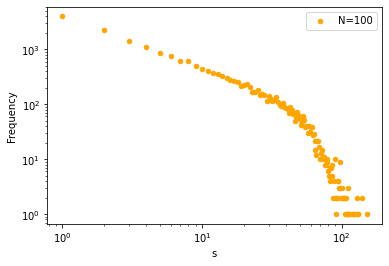

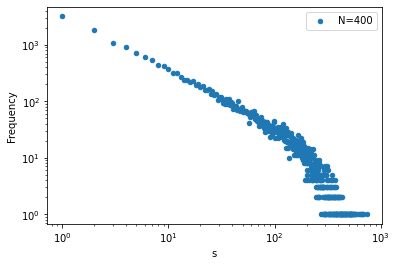

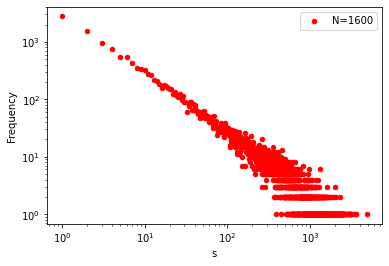

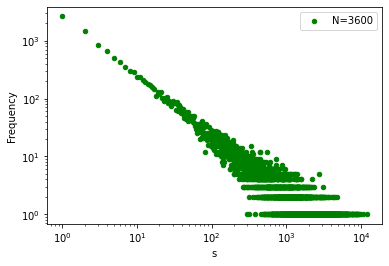

In [52]:
data = [
    (avalanche_sizes_grid_10, frequencies_grid_10, 'N=100', 'orange', '2d_grid_graph_N100_scatter.png'),
    (avalanche_sizes_grid_20, frequencies_grid_20, 'N=400', None, '2d_grid_graph_N400_scatter.png'),
    (avalanche_sizes_grid_40, frequencies_grid_40, 'N=1600', 'red', '2d_grid_graph_N1600_scatter.png'),
    (avalanche_sizes_grid_60, frequencies_grid_60, 'N=3600', 'green', '2d_grid_graph_N3600_scatter.png')
]

for avalanche_sizes, frequencies, label, color, filename in data:
    plt.figure()
    plt.scatter(avalanche_sizes, frequencies, s=20, color=color, label=label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('s')
    plt.ylabel('Frequency')
    plt.legend()
    #plt.savefig(filename, dpi=300)
    plt.show()


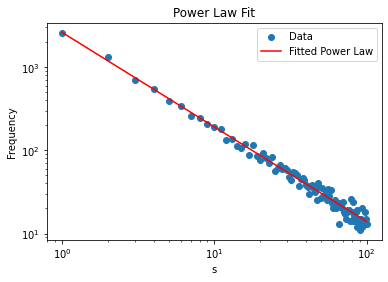

critical exponent: 1.1347545313157155


In [128]:
####to get critical exponent by fitting part of the data (truncated power law) using network with N=10000 

avalanche_sizes_grid_100, frequencies_grid_100 = np.unique(grid_network_data_100, return_counts=True)

# Filter data within the power law range
x_range = avalanche_sizes_grid_100 <= 100
filtered_x = avalanche_sizes_grid_100[x_range]
filtered_y = frequencies_grid_100[x_range]

# Fit power law to the filtered data
popt, pcov = curve_fit(power_law, filtered_x, filtered_y)

# Obtain parameters
a = popt[0]
b = popt[1] #slope

# Fitted curve within the range
x_fit = np.logspace(0, 2, len(filtered_x))
y_fit = power_law(x_fit, a, b)

# Plot the data and fitted curve
plt.scatter(filtered_x, filtered_y, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Power Law')  # visually acceptable
plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel('Frequency')
plt.title('Power Law Fit') 
plt.legend()
plt.show()
print("critical exponent:", b)


assess the fit

In [133]:
expected_y = power_law(filtered_x, a, b)
expected_y_scaled = expected_y / np.sum(expected_y) * np.sum(filtered_y) #to normalize

chi, p = chisquare(f_obs=filtered_y, f_exp=expected_y_scaled)

# degree of freedom
df = len(filtered_x) - len(popt) - 1

print("Chi square statistic:", chi)
print("p value:", p)

# Significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")


Chi square statistic: 85.10451683354202
p value: 0.8388952612732565
Don't reject the null hypothesis


Fit simulated data with curve (power law with exponential cutoff) and plot probability density and data collapse 

<ipython-input-50-a3cdbfcf9198>:3: RuntimeWarning: overflow encountered in power
  return a* x**-b * np.exp(-c * x)
<ipython-input-50-a3cdbfcf9198>:3: RuntimeWarning: overflow encountered in exp
  return a* x**-b * np.exp(-c * x)
<ipython-input-50-a3cdbfcf9198>:3: RuntimeWarning: overflow encountered in multiply
  return a* x**-b * np.exp(-c * x)


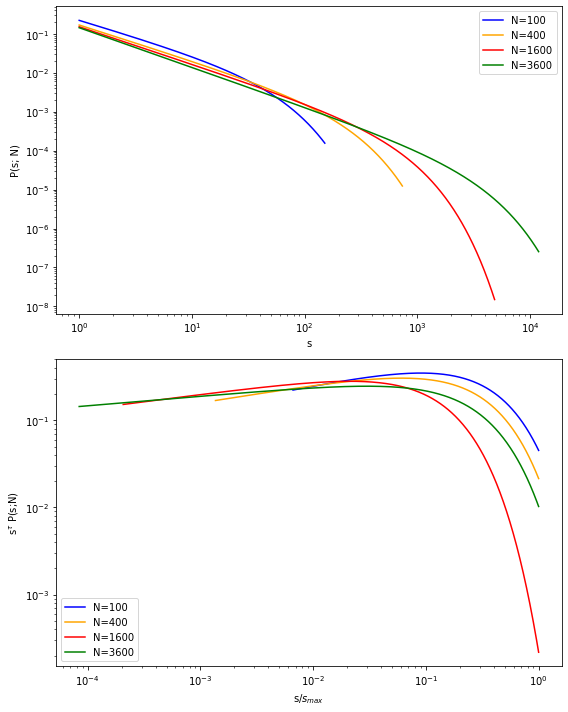

In [121]:
data = [
    (avalanche_sizes_grid_10, frequencies_grid_10, 'N=100', 'blue'),
    (avalanche_sizes_grid_20, frequencies_grid_20, 'N=400', 'orange'),
    (avalanche_sizes_grid_40, frequencies_grid_40, 'N=1600', 'red'),
    (avalanche_sizes_grid_60, frequencies_grid_60, 'N=3600', 'green')
]

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

for avalanche_sizes, frequencies, label, color in data:
    popt, pcov = curve_fit(power_law_with_exponential_cutoff, avalanche_sizes, frequencies) 
    x_fit = np.logspace(np.log10(min(avalanche_sizes)), np.log10(max(avalanche_sizes)), 1000)
    y_fit = power_law_with_exponential_cutoff(x_fit, *popt)
    norm_constant = np.trapz(y_fit, x=x_fit)
    pdf_fit = y_fit / norm_constant
    scaling_factor = np.max(x_fit)
    avalanche_sizes_scaled = x_fit / scaling_factor
    pdf_fit_scaled = pdf_fit * (x_fit ** 1.13) 
    
    axes[0].loglog(x_fit, pdf_fit, label=label, color=color)
    axes[1].loglog(avalanche_sizes_scaled, pdf_fit_scaled, label=label, color=color)

axes[0].set_xlabel('s')
axes[0].set_ylabel('P(s; N)')
axes[0].legend()

axes[1].set_xlabel(r's/$s_{max}$')
axes[1].set_ylabel(r's$^\tau$ P(s;N)')
axes[1].legend()

r'$\lambda$'
plt.tight_layout()
plt.show()
